In [20]:
import cv2

capture = cv2.VideoCapture(0)
# capture.set(cv2.CAP_PROP_FRAME_WIDTH, 340)
# capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 476)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = capture.read()

    #그레이 처리
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 인식을 위해 얼굴 검출기를 로드합니다.

    # 이미지에서 얼굴을 검출합니다.
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # 검출된 얼굴 주위에 사각형을 그립니다.
    for (x, y, w, h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255, 0, 0),2)
      cv2.putText(frame, 'Face', (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
      cv2.imshow("VideoFrame", frame)

    
    if cv2.waitKey(10)>0:
        break

capture.release()
cv2.destroyAllWindows()

In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

def pilPutText(src, text, pos, font_size, font_color):
    img_pil = Image.fromarray(src)
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype("fonts/gulim.ttc", font_size)
    draw.text(pos, text, font=font, fill=font_color)
    return np.array(img_pil)

img = np.zeros((480, 640, 3), dtype=np.uint8)
img = pilPutText(img, "안녕", (30, 30), 30, (0, 255, 255))

cv2.imshow("text", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import datetime
import cv2

#capture = cv2.VideoCapture("sample_1280x720_surfing_with_audio.avi")
capture = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
record = False

while True:
    # if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)-1):
    #     capture.open("./deeplearning/opencv/sample_1280x720_surfing_with_audio.avi")

    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(33)

    if key == 27: #ESC
        break
    elif key == ord('c'):
        print("캡쳐")
        cv2.imwrite("C:/Users/dohye/Downloads/" + str(now) + ".png", frame)
    elif key == ord('r'):
        print("녹화 시작")
        record = True
        video = cv2.VideoWriter("C:/Users/dohye/Downloads/" + str(now) + ".avi", fourcc, 20.0, (frame.shape[1], frame.shape[0]))
    elif key == ord('s'):
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()

녹화 시작
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중지


In [37]:
import cv2
import numpy as np

circle_list=[]
radius_list=[]
def mouse_event(event, x, y, flags, param):
    print("event x y flags", event, x, y, flags)
    diff = 2
    global radius
    if event == cv2.EVENT_RBUTTONDOWN:
        circle_list.append((x,y))
        radius_list.append(radius)

    elif event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:
            radius += diff
        elif radius > 1:
            radius -= diff

capture = cv2.namedWindow("draw")
capture = cv2.VideoCapture(0)
radius = 5
frame = np.full((500, 500, 3), 255, dtype=np.uint8)
#reuslt_frame=frame.copy()


while True:
    ret, frame = capture.read()

    for i in range(len(circle_list)):
        cv2.circle(frame, circle_list[i], radius_list[i], (255, 0, 0), 2)

    cv2.setMouseCallback("draw", mouse_event)
    cv2.imshow("draw", frame)
    key = cv2.waitKey(33)



    if key == 27: #ESC
        break


capture.release()
cv2.destroyAllWindows()

event x y flags 0 105 382 8
event x y flags 0 266 275 0
event x y flags 0 216 274 0
event x y flags 0 215 274 0
event x y flags 0 215 274 0
event x y flags 0 214 274 0
event x y flags 0 214 273 0
event x y flags 0 214 273 0
event x y flags 0 213 273 0
event x y flags 0 213 273 0
event x y flags 0 212 273 0
event x y flags 0 211 273 0
event x y flags 0 211 272 0
event x y flags 0 210 272 0
event x y flags 0 209 272 0
event x y flags 0 209 272 0
event x y flags 0 206 270 0
event x y flags 10 206 271 7864320
event x y flags 0 205 270 0
event x y flags 10 205 271 7864320
event x y flags 0 205 272 0
event x y flags 0 205 272 0
event x y flags 10 203 273 15728640
event x y flags 0 203 273 0
event x y flags 0 201 272 0
event x y flags 10 200 273 7864320
event x y flags 0 200 272 0
event x y flags 0 200 272 0
event x y flags 10 200 272 7864320
event x y flags 0 199 272 0
event x y flags 0 199 271 0
event x y flags 0 196 266 0
event x y flags 0 190 260 0
event x y flags 0 190 259 0
event x y fl

In [45]:
import cv2

def onChange(pos):
    pass

src = cv2.imread("../23_12_20/a.jpg", cv2.IMREAD_GRAYSCALE)

cv2.namedWindow("Trackbar Windows")

cv2.createTrackbar("threshold", "Trackbar Windows", 0, 255, onChange)
cv2.createTrackbar("maxValue", "Trackbar Windows", 0, 255, lambda x : x)

# cv2.setTrackbarPos("threshold", "Trackbar Windows", 127)
# cv2.setTrackbarPos("maxValue", "Trackbar Windows", 255)

while cv2.waitKey(1) != ord('q'):

    thresh = cv2.getTrackbarPos("threshold", "Trackbar Windows")
    maxval = cv2.getTrackbarPos("maxValue", "Trackbar Windows")

    _, binary = cv2.threshold(src, thresh, maxval, cv2.THRESH_BINARY)

    cv2.imshow("Trackbar Windows", binary)

cv2.destroyAllWindows()

In [46]:
import cv2

def onChange(pos):
    pass

cv2.namedWindow("Trackbar Windows")
capture = cv2.VideoCapture(0)

cv2.createTrackbar("threshold", "Trackbar Windows", 0, 255, onChange)
cv2.createTrackbar("maxValue", "Trackbar Windows", 0, 255, lambda x : x)

while True:
    thresh = cv2.getTrackbarPos("threshold", "Trackbar Windows")
    maxval = cv2.getTrackbarPos("maxValue", "Trackbar Windows")

    ret, frame = capture.read()

    dst=cv2.Canny(frame,thresh,maxval)
    cv2.imshow("Trackbar Windows", dst)

    key = cv2.waitKey(33)
    if key == 27: #ESC
        break

capture.release()
cv2.destroyAllWindows()

In [47]:
# 윤곽선
import cv2

src = cv2.imread("../23_12_20/a.jpg", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    # print(i, hierarchy[0][i])
    cv2.imshow("src", src)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [48]:
import cv2

src = cv2.imread("../23_12_20/a.jpg")
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)

for i in corners:
    cv2.circle(dst, tuple(map(int, i[0])), 3, (0, 0, 255), 2)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
# 히스토그램
import cv2
import numpy as np

src = cv2.imread("../23_12_20/a.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
result = np.zeros((src.shape[0], 256), dtype=np.uint8)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
cv2.normalize(hist, hist, 0, result.shape[0], cv2.NORM_MINMAX)

for x, y in enumerate(hist):
    cv2.line(result, (int(x), result.shape[0]), (int(x), result.shape[0] - int(y)), 255)

dst = np.hstack([gray, result])

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

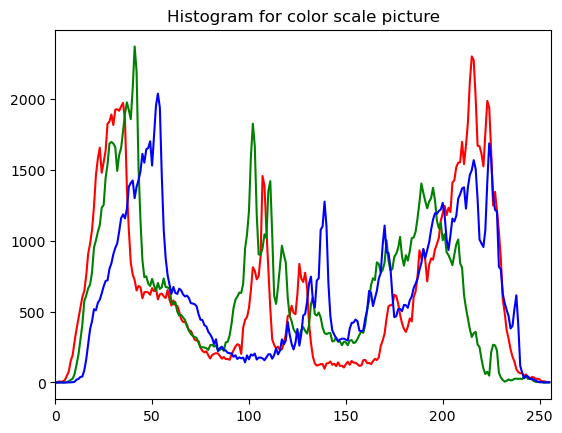

In [51]:
# color histogram
import cv2
import matplotlib.pyplot as plt

# 이미지 로드
img = cv2.imread("../23_12_20/a.jpg")

# OpenCV에서는 색상 채널 순서가 BGR이므로 RGB로 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 각 채널별로 히스토그램 계산
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])

plt.title('Histogram for color scale picture')
plt.show()

In [53]:
# 템플릿 매칭
import cv2

src = cv2.imread("hats.webp", cv2.IMREAD_GRAYSCALE)
templit = cv2.imread("hat.webp", cv2.IMREAD_GRAYSCALE)
dst = cv2.imread("hats.webp")

result = cv2.matchTemplate(src, templit, cv2.TM_SQDIFF_NORMED)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
x, y = minLoc
h, w = templit.shape
print(result)
print(x, y)

dst = cv2.rectangle(dst, (x, y), (x +  w, y + h) , (0, 0, 255), 1)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.35533297 0.35373935 0.35233006 ... 0.38107723 0.38054636 0.38003504]
 [0.35876653 0.3570789  0.35559902 ... 0.37908155 0.37852526 0.37799665]
 [0.36310115 0.36135522 0.35979638 ... 0.37734947 0.37675878 0.3761936 ]
 ...
 [0.33359423 0.33221167 0.33134934 ... 0.5346984  0.52616715 0.51813215]
 [0.3475707  0.34613252 0.34522045 ... 0.5370005  0.528527   0.5205167 ]
 [0.36116964 0.3596826  0.35871062 ... 0.53968567 0.5312418  0.52326816]]
0 301
